<a href="https://colab.research.google.com/github/rim-nsr3/Brain-Tumor-Classification/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:08<00:00, 22.8MB/s]
100% 149M/149M [00:08<00:00, 18.1MB/s]


In [5]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df


In [6]:
tr_df = get_class_paths("/content/Training")

In [7]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0114.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0957.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0632.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_0289.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_1411.jpg,pituitary
...,...,...
5707,/content/Training/notumor/Tr-no_0019.jpg,notumor
5708,/content/Training/notumor/Tr-no_1371.jpg,notumor
5709,/content/Training/notumor/Tr-no_1499.jpg,notumor
5710,/content/Training/notumor/Tr-no_0593.jpg,notumor


In [8]:
ts_df = get_class_paths("/content/Testing")

In [9]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0045.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0010.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0233.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0219.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0132.jpg,pituitary
...,...,...
1306,/content/Testing/notumor/Te-no_0401.jpg,notumor
1307,/content/Testing/notumor/Te-no_0019.jpg,notumor
1308,/content/Testing/notumor/Te-no_0298.jpg,notumor
1309,/content/Testing/notumor/Te-no_0153.jpg,notumor


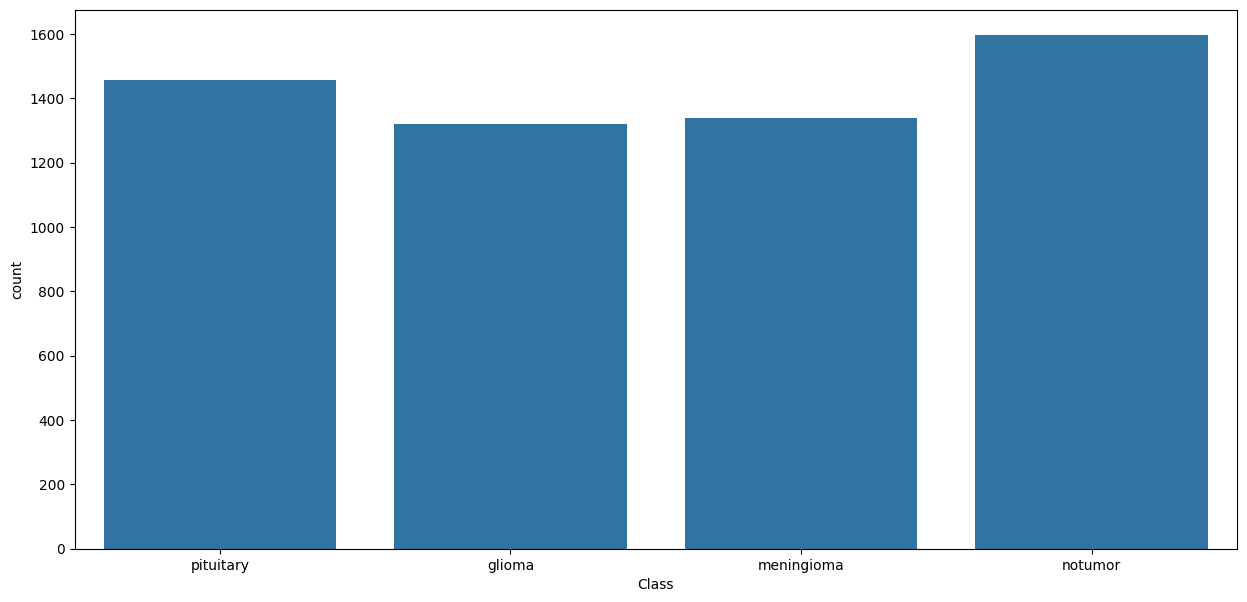

In [10]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

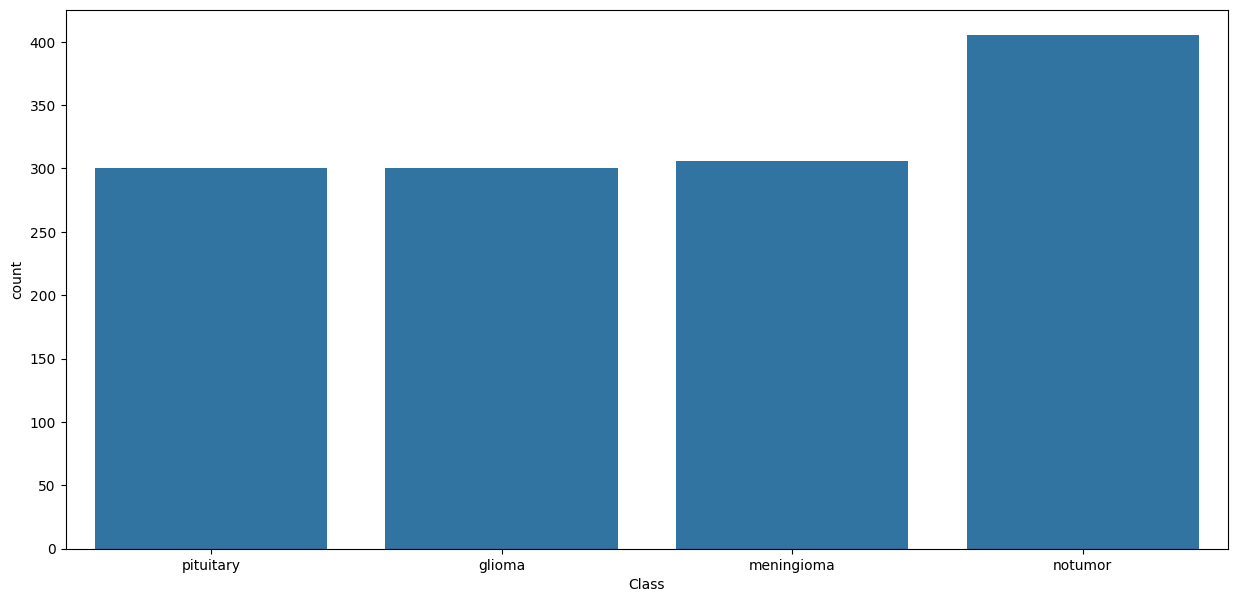

In [11]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [14]:
valid_df

,Class Path,Class
489,/content/Testing/glioma/Te-gl_0128.jpg,glioma
38,/content/Testing/pituitary/Te-pi_0173.jpg,pituitary
585,/content/Testing/glioma/Te-gl_0039.jpg,glioma
1270,/content/Testing/notumor/Te-no_0390.jpg,notumor
103,/content/Testing/pituitary/Te-pi_0251.jpg,pituitary
...,...,...
1009,/content/Testing/notumor/Te-no_0161.jpg,notumor
1006,/content/Testing/notumor/Te-no_0301.jpg,notumor
319,/content/Testing/glioma/Te-gl_0022.jpg,glioma
486,/content/Testing/glioma/Te-glTr_0005.jpg,glioma


In [15]:
ts_df

,Class Path,Class
496,/content/Testing/glioma/Te-gl_0284.jpg,glioma
650,/content/Testing/meningioma/Te-me_0295.jpg,meningioma
427,/content/Testing/glioma/Te-gl_0203.jpg,glioma
1286,/content/Testing/notumor/Te-no_0156.jpg,notumor
76,/content/Testing/pituitary/Te-pi_0061.jpg,pituitary
...,...,...
370,/content/Testing/glioma/Te-glTr_0007.jpg,glioma
1287,/content/Testing/notumor/Te-no_0172.jpg,notumor
1170,/content/Testing/notumor/Te-no_0049.jpg,notumor
49,/content/Testing/pituitary/Te-pi_0072.jpg,pituitary


In [16]:
batch_size = 32

img_size = (299,299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)



In [17]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


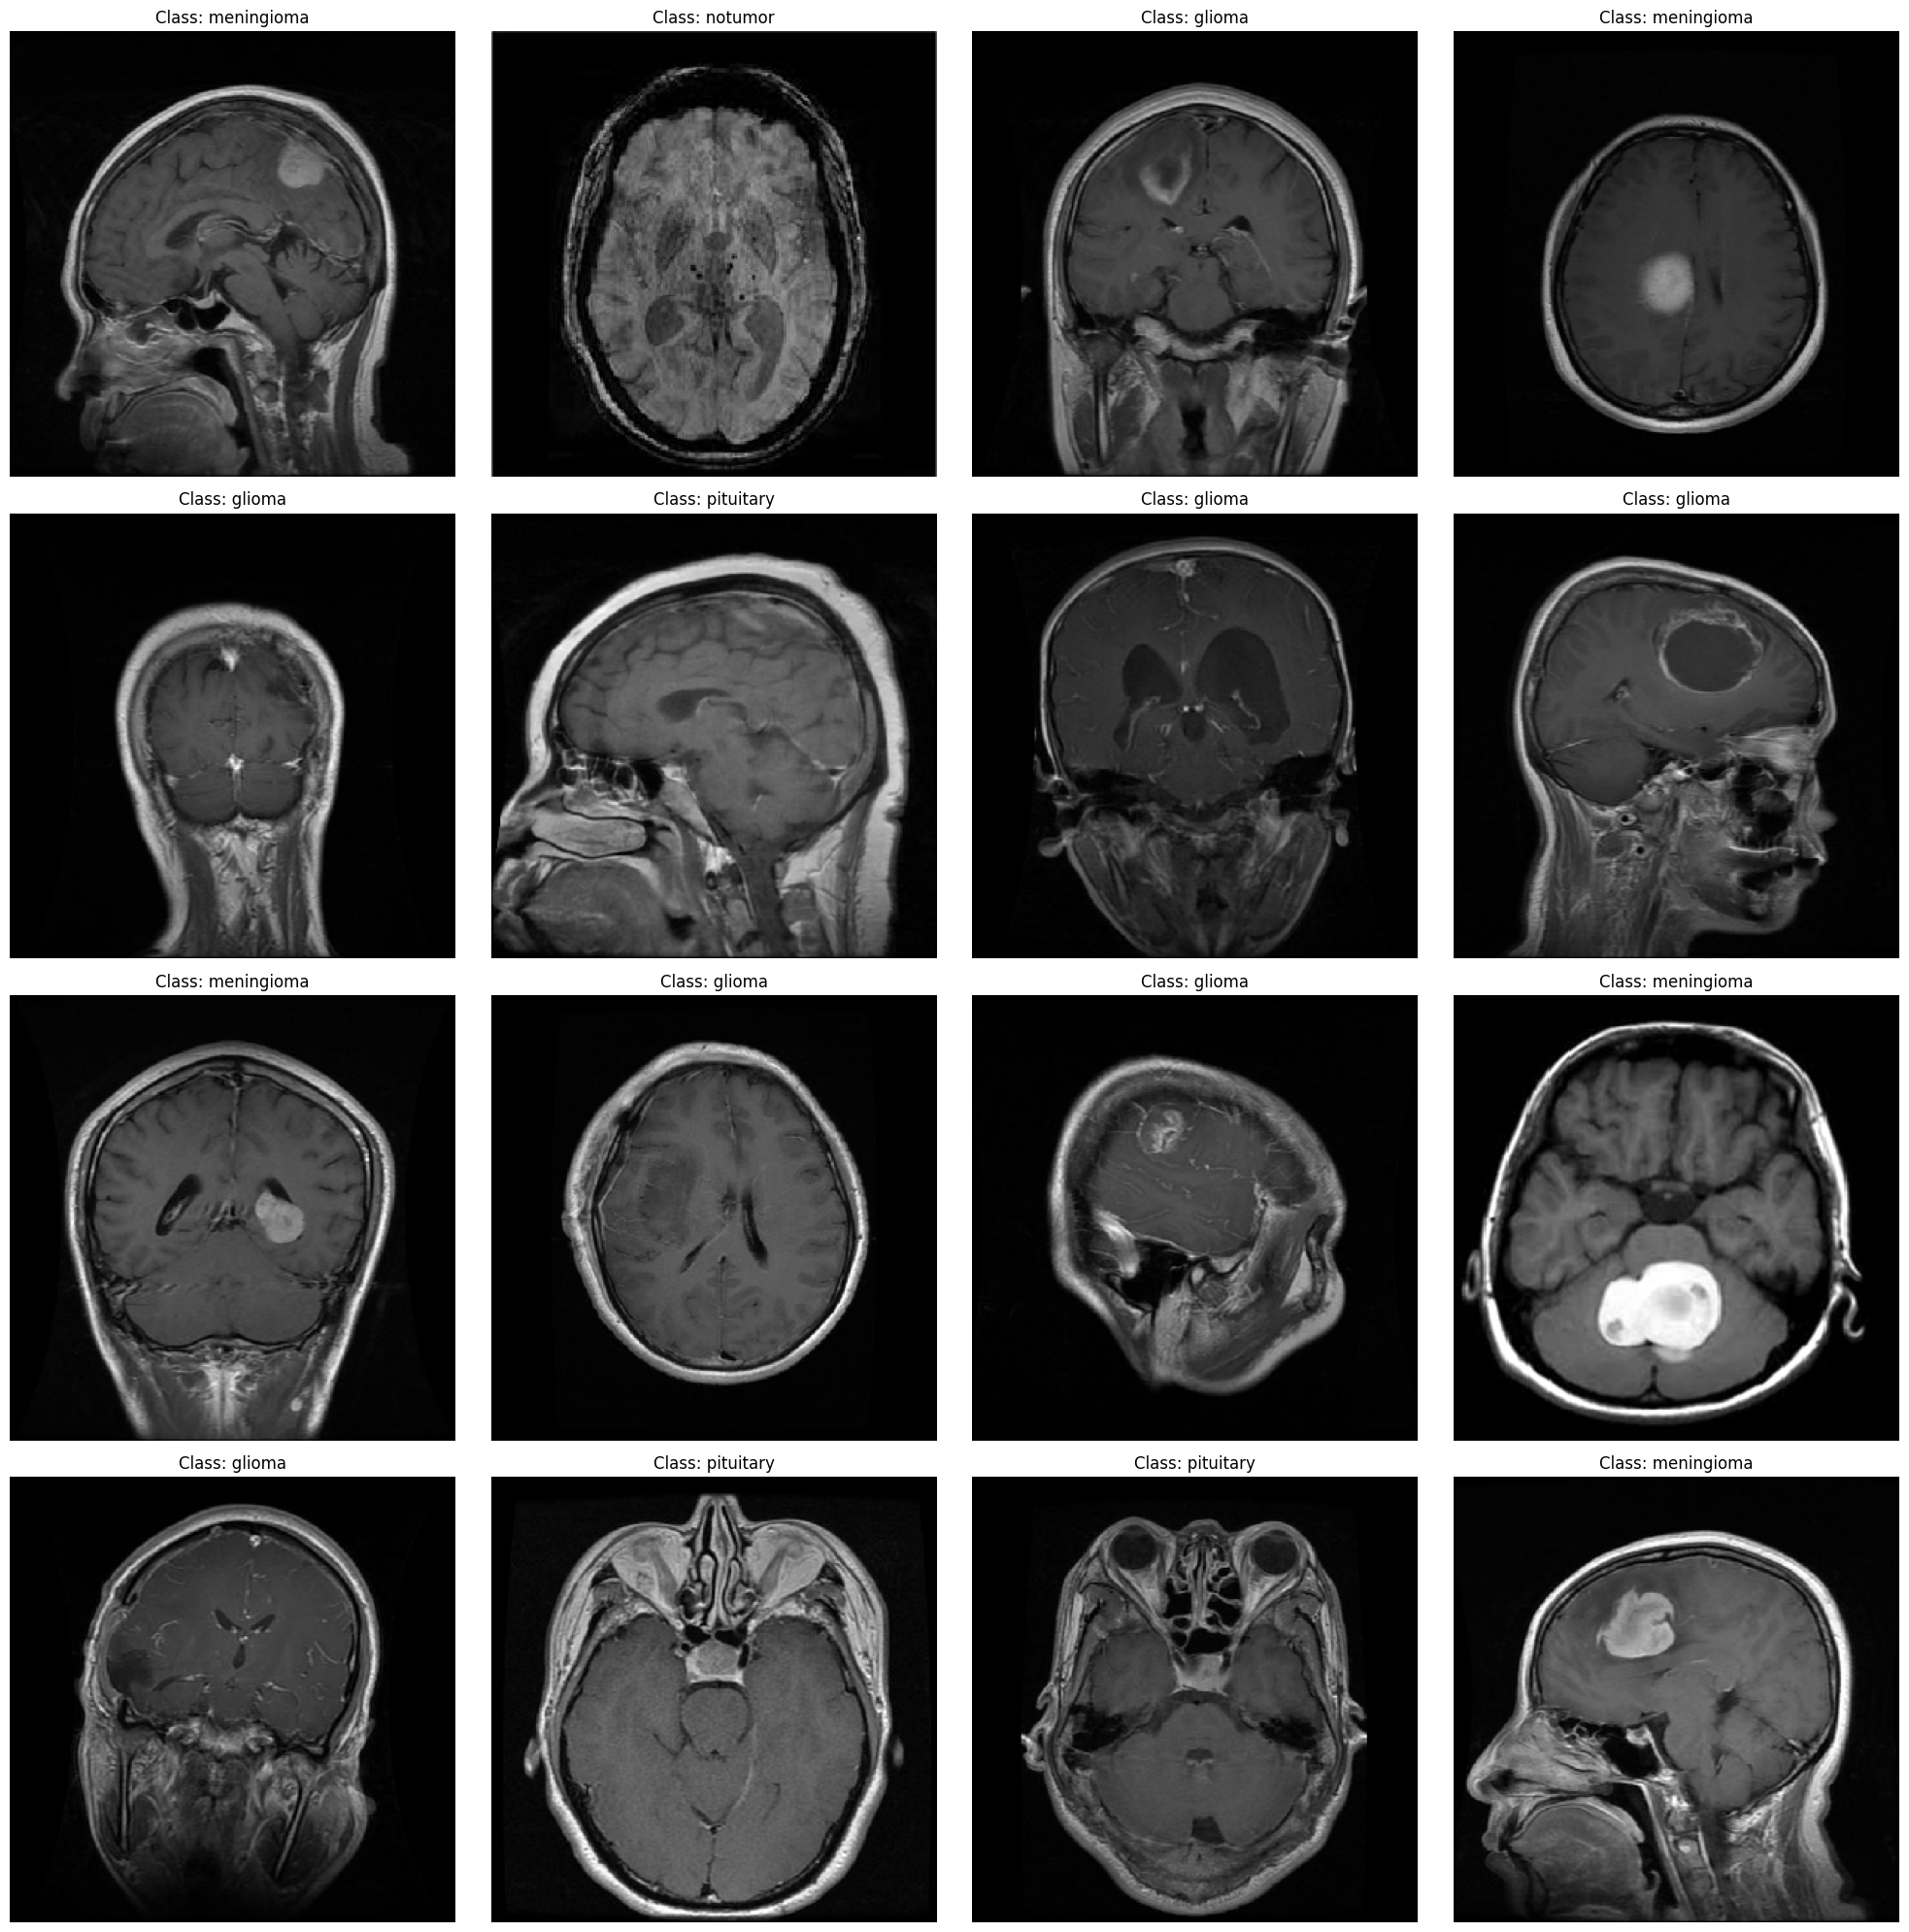

In [18]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [19]:
 img_shape = (299, 299, 3)
 base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling="max"
)
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [20]:
model.compile(
    Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)


In [21]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.6835 - loss: 0.8838 - precision: 0.7893 - recall: 0.5484 - val_accuracy: 0.8061 - val_loss: 0.6677 - val_precision: 0.8086 - val_recall: 0.8000
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 147s 796ms/step - accuracy: 0.9753 - loss: 0.0812 - precision: 0.9772 - recall: 0.9722 - val_accuracy: 0.9588 - val_loss: 0.1407 - val_precision: 0.9615 - val_recall: 0.9542
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 798ms/step - accuracy: 0.9898 - loss: 0.0344 - precision: 0.9916 - recall: 0.9892 - val_accuracy: 0.9863 - val_loss: 0.0511 - val_precision: 0.9892 - val_recall: 0.9832
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 794ms/step - accuracy: 0.9968 - loss: 0.0104 - precision: 0.9969 - recall: 0.9963 - val_accuracy: 0.9863 - val_loss: 0.0499 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 795ms/step - accuracy: 0.9960 - loss: 0.0121 - precision: 0.9960 - recall: 0.9959 - val_accuracy: 0.9832 - val_loss: 

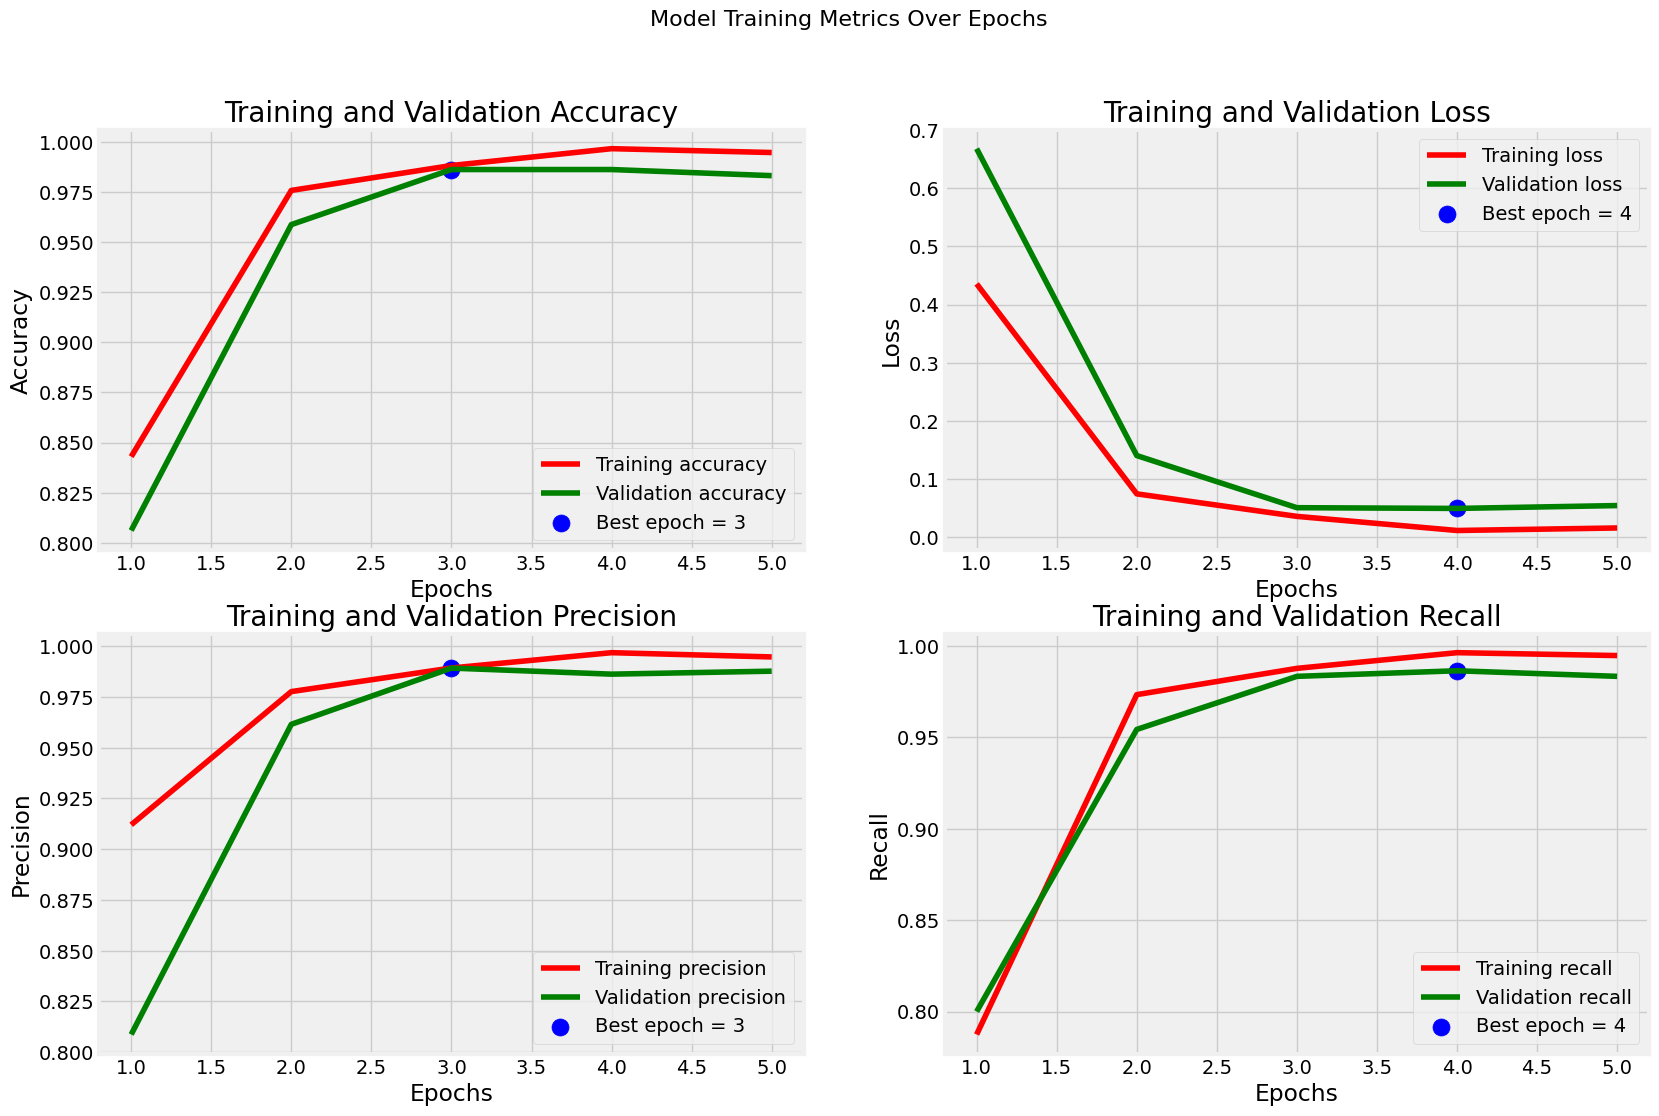

In [22]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.grid(True)
    plt.legend()

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [23]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")

print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")

print(f"\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 250ms/step - accuracy: 0.9973 - loss: 0.0113 - precision: 0.9973 - recall: 0.9964
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.9817 - loss: 0.0745 - precision: 0.9817 - recall: 0.9814
 1/41 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9375 - loss: 0.1663 - precision: 0.9375 - recall: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9863 - loss: 0.0458 - precision: 0.9863 - recall: 0.9863
Train Accuracy: 99.61%
Train Loss: 0.0128

Validation Accuracy: 98.78%
Validation Loss: 0.0508

Test Accuracy: 98.78%
Test Loss: 0.0419


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step


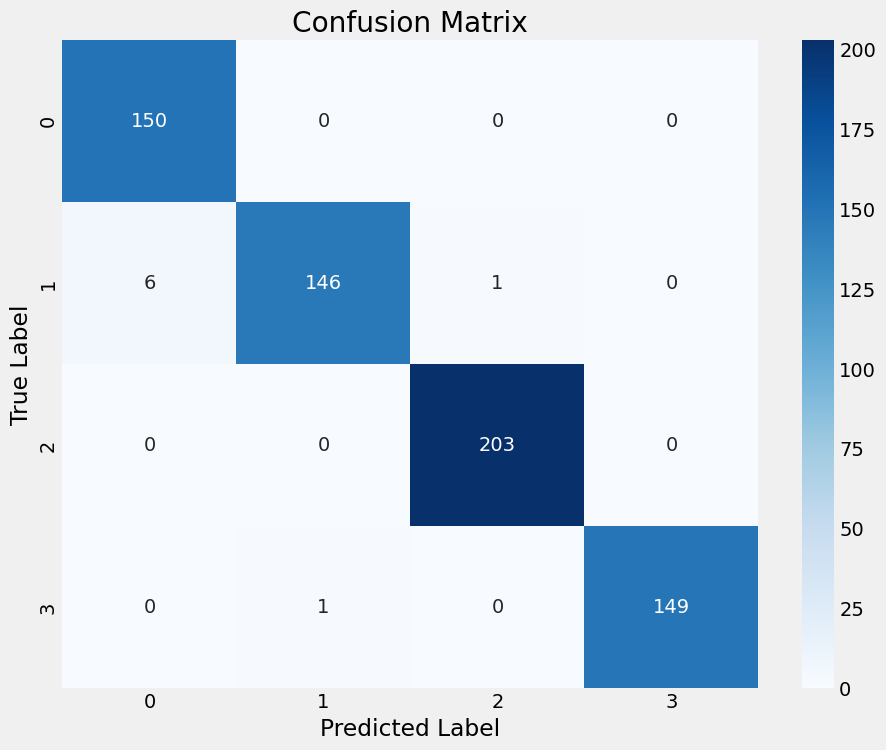

In [24]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.bar(labels, probabilities)
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


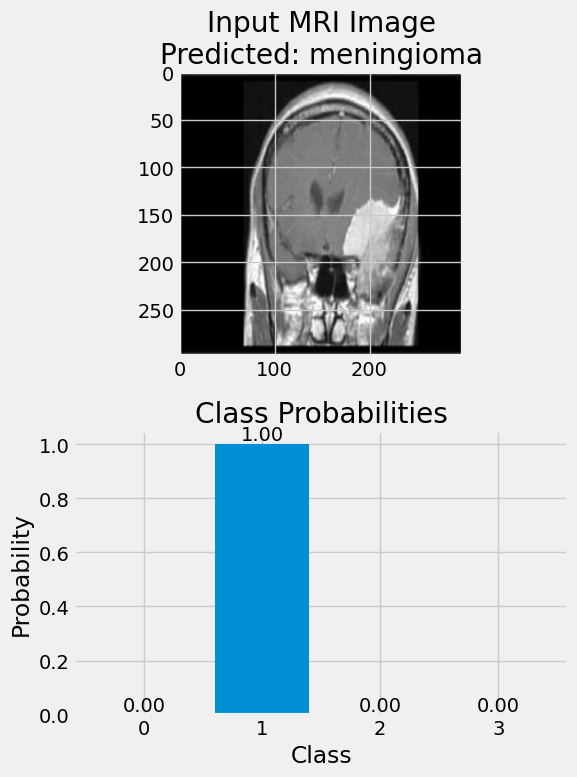


Predicted tumor type: meningioma


In [26]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

In [27]:
model.save_weights("xception_model.weights.h5")

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [29]:
batch_size = 16

img_size = (224,224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [30]:
# Create a Sequential model
cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))
cnn_model.add(Dense(4, activation='softmax'))  # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(optimizer=Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 147s 336ms/step - accuracy: 0.5667 - loss: 2.2469 - precision_1: 0.7033 - recall_1: 0.3869 - val_accuracy: 0.7634 - val_loss: 0.8733 - val_precision_1: 0.8304 - val_recall_1: 0.6504
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 163s 294ms/step - accuracy: 0.8082 - loss: 0.7141 - precision_1: 0.8338 - recall_1: 0.7748 - val_accuracy: 0.8458 - val_loss: 0.5615 - val_precision_1: 0.8595 - val_recall_1: 0.8122
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 103s 288ms/step - accuracy: 0.8545 - loss: 0.5456 - precision_1: 0.8690 - recall_1: 0.8376 - val_accuracy: 0.8382 - val_loss: 0.5330 - val_precision_1: 0.8500 - val_recall_1: 0.8305
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 287ms/step - accuracy: 0.8900 - loss: 0.4351 - precision_1: 0.8988 - recall_1: 0.8823 - val_accuracy: 0.8687 - val_loss: 0.4830 - val_precision_1: 0.8748 - val_recall_1: 0.8534
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 105s 294ms/step - accuracy: 0.9231 - loss: 0.3598 - precision_1: 0.9293 - recall_1: 0.9

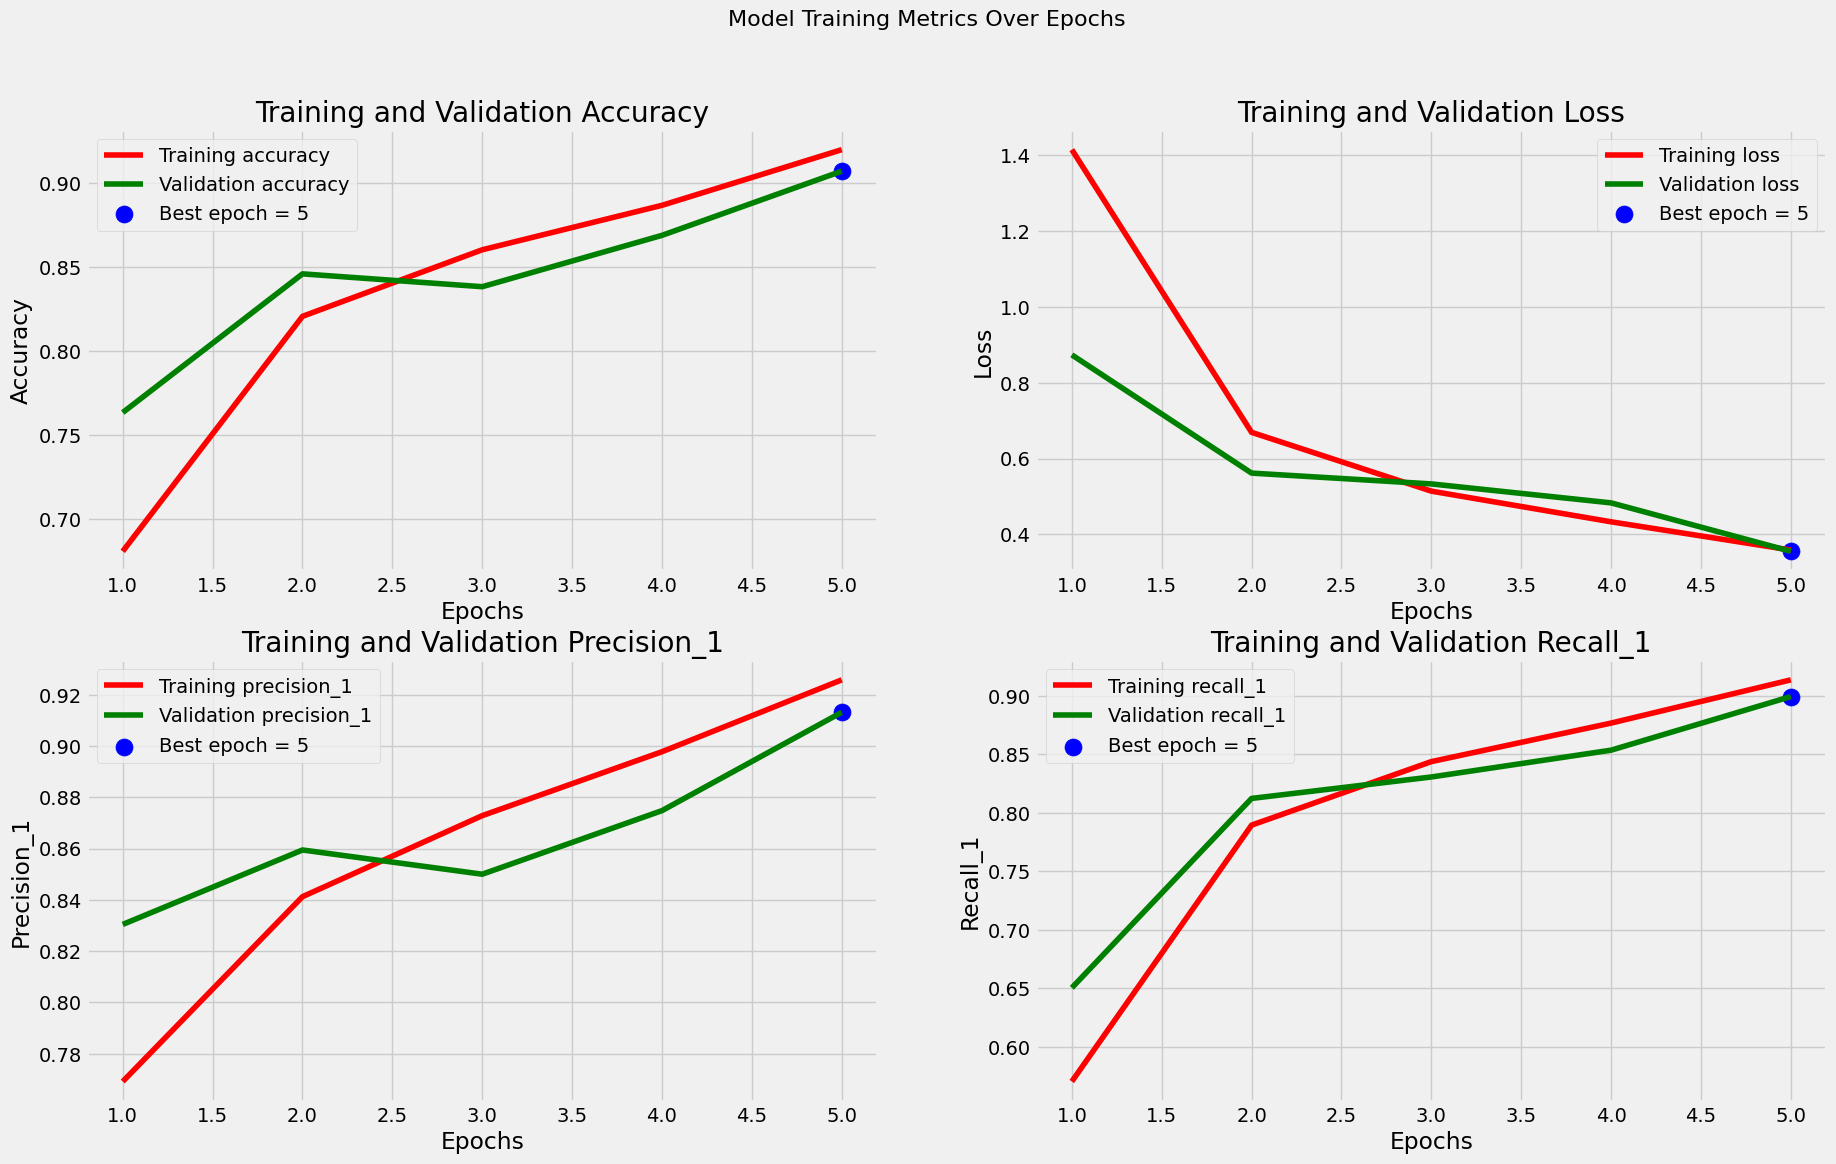

In [35]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.grid(True)
    plt.legend()

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [36]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")

print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")

print(f"\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.9593 - loss: 0.2697 - precision_1: 0.9639 - recall_1: 0.9562
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.8923 - loss: 0.3901 - precision_1: 0.8994 - recall_1: 0.8807
 1/41 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.9375 - loss: 0.3321 - precision_1: 0.9375 - recall_1: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9077 - loss: 0.3603 - precision_1: 0.9122 - recall_1: 0.9035
Train Accuracy: 95.68%
Train Loss: 0.2717

Validation Accuracy: 90.84%
Validation Loss: 0.3522

Test Accuracy: 90.85%
Test Loss: 0.3543


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step


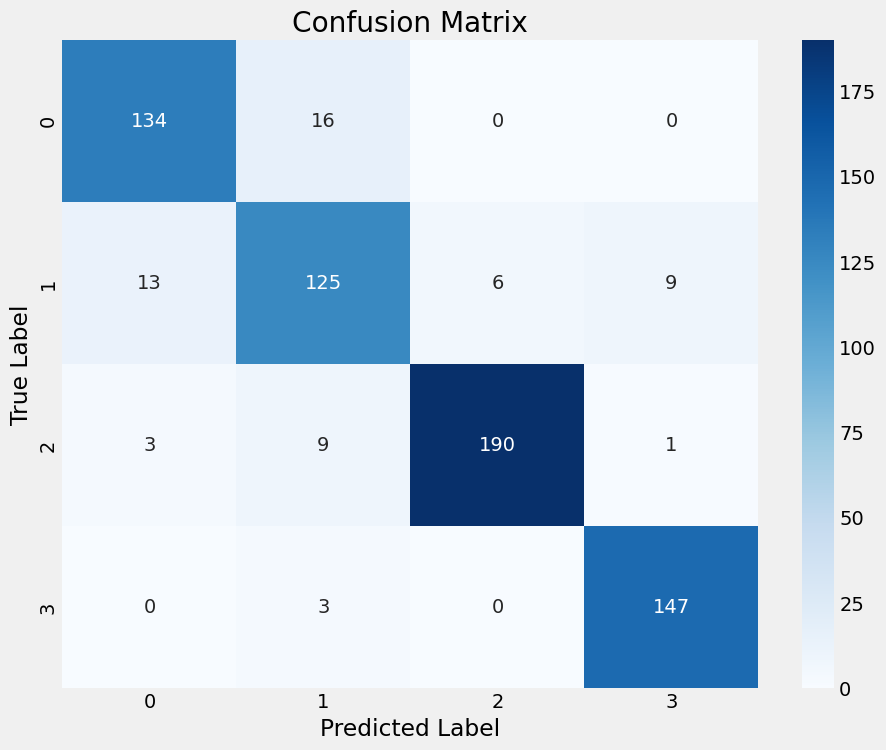

In [37]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       150
           1       0.82      0.82      0.82       153
           2       0.97      0.94      0.95       203
           3       0.94      0.98      0.96       150

    accuracy                           0.91       656
   macro avg       0.90      0.91      0.91       656
weighted avg       0.91      0.91      0.91       656



In [39]:
cnn_model.save("cnn_model.h5")